## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


### Find no.of samples are there in training and test datasets

In [2]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [3]:
y_train.shape

(60000,)

### Find dimensions of an image in the dataset

In [8]:
x_train.shape[1:]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [14]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
import pandas as pd

In [18]:
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [0]:
import keras

In [0]:
y_train_cat = keras.utils.to_categorical(y_train, 10) #converts to 10 categorical variable
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [24]:
y_train_cat.shape

(60000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [25]:
x_train.dtype

dtype('uint8')

In [26]:
x_test.dtype

dtype('uint8')

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [29]:
x_train.dtype

dtype('float32')

In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [34]:
print("train shape ",x_train.shape)
print("test shape ",x_test.shape)

train shape  (60000, 28, 28, 1)
test shape  (10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from matplotlib import pyplot as plt
import seaborn as sns

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [37]:
TRAIN = False
BATCH_SIZE = 1000
EPOCHS = 10

# Define model
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1))) #32- no. of filters and 3 * 3 is the filter shape
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

 # Train the model2
model.fit(x_train, y_train_cat, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test_cat), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.6504 - acc: 0.7724 - val_loss: 0.4359 - val_acc: 0.8428
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.3629 - acc: 0.8705 - val_loss: 0.3632 - val_acc: 0.8683
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.3030 - acc: 0.8916 - val_loss: 0.3246 - val_acc: 0.8788
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2730 - acc: 0.9012 - val_loss: 0.2987 - val_acc: 0.8930
Epoch 5/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2470 - acc: 0.9105 - val_loss: 0.2940 - val_acc: 0.8938
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2241 - acc: 0.9188 - val_loss: 0.2773 - val_acc: 0.9016
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2051 - acc: 0.9257 - val_loss: 0.2726 - val_acc

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [38]:
# Define Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model2.fit(x_train, y_train_cat, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(x_test, y_test_cat), callbacks=callback_list)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.7453 - acc: 0.7331 - val_loss: 0.5146 - val_acc: 0.8096
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.4428 - acc: 0.8413 - val_loss: 0.4146 - val_acc: 0.8507
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.3763 - acc: 0.8680 - val_loss: 0.3647 - val_acc: 0.8729
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.3461 - acc: 0.8771 - val_loss: 0.3371 - val_acc: 0.8854
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.3175 - acc: 0.8882 - val_loss: 0.3203 - val_acc: 0.8880
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.3006 - acc: 0.8929 - val_loss: 0.3142 - val_acc: 0.8887
Epoch 7/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.2843 - acc: 0.8986 - val_loss: 0.2937 - val_acc

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

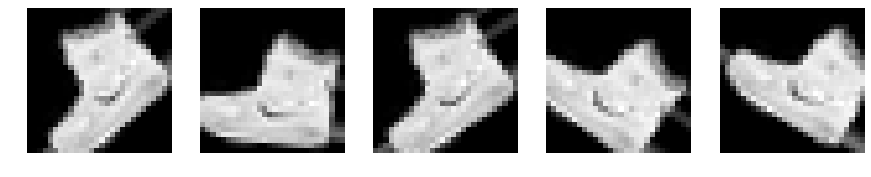

In [42]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [61]:
# Define Model
model3 = Sequential()

# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model3.add(Dropout(0.25))

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))

# Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [62]:
model3.fit_generator(datagen.flow(x_train, y_train_cat, batch_size=BATCH_SIZE),validation_data=(x_test, y_test_cat), steps_per_epoch=len(x_train)/1000,epochs=EPOCHS)

Epoch 1/10
60/60 [==============================] - 11s 176ms/step - loss: 1.2319 - acc: 0.5590 - val_loss: 0.7971 - val_acc: 0.7127
Epoch 2/10
60/60 [==============================] - 10s 167ms/step - loss: 0.8664 - acc: 0.6848 - val_loss: 0.7331 - val_acc: 0.7297
Epoch 3/10
60/60 [==============================] - 11s 188ms/step - loss: 0.7681 - acc: 0.7222 - val_loss: 0.6405 - val_acc: 0.7590
Epoch 4/10
60/60 [==============================] - 10s 169ms/step - loss: 0.7031 - acc: 0.7422 - val_loss: 0.5812 - val_acc: 0.7820
Epoch 5/10
60/60 [==============================] - 10s 168ms/step - loss: 0.6507 - acc: 0.7625 - val_loss: 0.5715 - val_acc: 0.7891
Epoch 6/10
60/60 [==============================] - 11s 178ms/step - loss: 0.6199 - acc: 0.7727 - val_loss: 0.5516 - val_acc: 0.8064
Epoch 7/10
60/60 [==============================] - 10s 172ms/step - loss: 0.5985 - acc: 0.7793 - val_loss: 0.5102 - val_acc: 0.8125
Epoch 8/10
60/60 [==============================] - 10s 167ms/step - 

###  Report the final train and validation accuracy

In [75]:
metrics = model3.evaluate(x_train,y_train_cat)

60000/60000 [==============================] - 3s 52us/step


In [77]:
print("Train Accuracy", metrics[1]*100,'%')

Train Accuracy 82.99666666666667 %


In [78]:
test_metrics = model3.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 1s 54us/step


In [80]:
print("Validation Accuracy", test_metrics[1]*100,'%')

Validation Accuracy 82.57 %


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [50]:
(c_x_train, c_y_train), (c_x_test, c_y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 38s 0us/step


In [51]:
print('--- THE DATA ---')
print('x_train shape:', c_x_train.shape)
print(c_x_train.shape[0], 'train samples')
print(c_x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [52]:
c_y_train.shape

(50000, 1)

In [0]:
#Prep the Data
c_x_train = c_x_train.astype('float32')
c_x_test = c_x_test.astype('float32')
c_x_train /= 255
c_x_test /= 255

In [55]:
np.unique(c_y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
c_y_train_cat = keras.utils.to_categorical(c_y_train, 10) #converts to 10 categorical variable
c_y_test_cat = keras.utils.to_categorical(c_y_test, 10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(c_x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

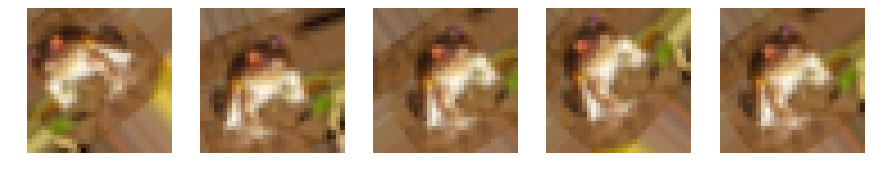

In [67]:
from matplotlib import pyplot as plt
gen = datagen.flow(c_x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()